In [36]:
# Jairo Andres Saavedra Alfonso
# 01 de Febrero de 2019
# Universidad de Los Andes
# Phycis 
######################__________________Report 01__________________######################

In [37]:
#Packages
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from astropy.table import Table

In [38]:
# Reading data from truth_DR12Q.fits. This file have the database sample of spectra with human-expert classifitacion

hdul = fits.open('truth_DR12Q.fits') # Open file
info=hdul.info() # File info
columns=hdul[1].columns # File Columns 
print(info,'/n',columns)
data=hdul[1].data # Database of spectra with human-expert classifications 
print(data['THING_ID'])


Filename: truth_DR12Q.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     27   546856R x 9C   [J, D, J, J, J, J, J, D, D]   
None /n ColDefs(
    name = 'THING_ID'; format = 'J'
    name = 'Z_VI'; format = 'D'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'CLASS_PERSON'; format = 'J'
    name = 'Z_CONF_PERSON'; format = 'J'
    name = 'BAL_FLAG_VI'; format = 'D'
    name = 'BI_CIV'; format = 'D'
)
[357405338 353907506  33180814 ... 352121795 401440280 401440241]


In [39]:
# The column 'CLASS_PERSON' have a class identifier for each spectrum: STARS=1, GALAXY=4, QSO=3 and QSO_BAL=30.
C_P=data['CLASS_PERSON'] #Class Person column 
STAR=C_P[C_P==1] # objects classified as stars
GALAXY=C_P[C_P==4] # objects classified as galaxies 
QSO=C_P[C_P==3] # objects classified as QSO (Quasars)
QSO_BAL=C_P[C_P==30] # objects classified as QSO BAL (Quasars with Broad Absortions Lines)
N_C=C_P[C_P!=30]   
N_C=N_C[N_C!=3]
N_C=N_C[N_C!=1]
N_C=N_C[N_C!=4] # objects wrong classified
print(STAR.shape)
print(GALAXY.shape)
print(QSO.shape)
print(QSO_BAL.shape)
print(N_C.shape)

(207915,)
(22795,)
(270686,)
(29659,)
(15801,)


In [40]:
Z_VI=data['Z_VI'] # Redshift of each object
print(Z_VI[Z_VI==0.0].shape)
Z_C_P=data['Z_CONF_PERSON']
print(Z_C_P[Z_C_P==0].shape)
T_ID=data['THING_ID']
i=T_ID==-1
T_ID=T_ID[i]

(214791,)
(7123,)


Text(0.5, 1.0, 'QSO')

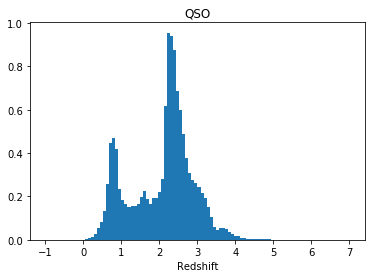

In [41]:
ii=C_P==3
oo=C_P==30
Z_VI_QSO=Z_VI[ii]
Z_VI_QSO_BAL=Z_VI[oo]
plt.hist(Z_VI_QSO,100,density=True)
plt.xlabel('Redshift')
plt.title('QSO')


Text(0.5, 1.0, 'QSO_BAL')

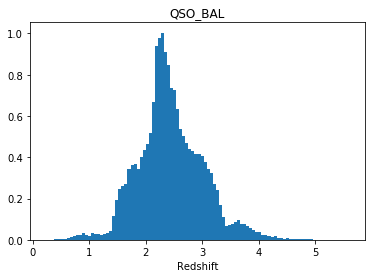

In [42]:
plt.hist(Z_VI_QSO_BAL,100,density=True)
plt.xlabel('Redshift')
plt.title('QSO_BAL')

Filename: data_dr12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (886, 639464)   float64   
  1                1 BinTableHDU     16   639464R x 4C   [J, J, J, J]   
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f3d840247b8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f3d847bf0b8>] /n ColDefs(
    name = 'TARGETID'; format = 'J'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
)


/home/steingate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


[ 87897905  96906927  96907939 ... 505037917 506611870 510289698]
[357405338 353907506  33180814 ... 352121795 401440280 401440241]
(536684,)


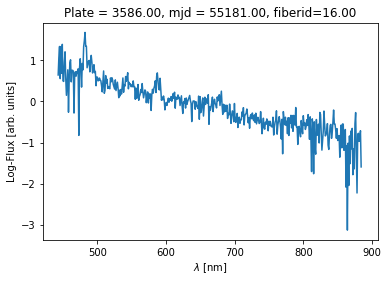

In [43]:
# Reading data from data_dr12.fits. This file had the spectra from data dr12. 
hdul_2 = fits.open('data_dr12.fits') # Open file
info=hdul_2.info() # File info 
columns=hdul_2[1].columns # File Columns 
print(hdul,'/n',columns)
data2=hdul_2[1].data # Database of spectra
spectra=hdul_2[0].data # Spectrum of each object 


# The Spectra in this database have three main parameters: Plate ID, The modified julian day and fiber ID of the observation.
# Let's take a look of the first spectrum.
x=np.linspace(443,886,443) # I cut the sample to 443 pixels in spaced log-wavelength.  
zero_spectrum=spectra[0] #First spectrum
zero_spectrum=zero_spectrum[:443]

PLATE=data2['PLATE'] # Spectra's Plate ID
MJD=data2['MJD'] # Spectra's the modified juliam day
FIBERID=data2['FIBERID'] # Spectra's fiber ID

zero_plate=PLATE[0] # zero spectrum Plate ID
zero_mjd=MJD[0] # zero spectrum MJD
zero_fiberid=FIBERID[0] # zero spectrum Fiber ID
param = 'Plate = {:.2f}, mjd = {:.2f}, fiberid={:.2f}'.format(zero_plate, zero_mjd, zero_fiberid)
plt.plot(x,np.log(zero_spectrum))
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Log-Flux [arb. units]')
plt.title(param)
plt.savefig('spectrum.png')

# I noticed that each object and spectrum don't have the same label. So it's imposible to make some ID correlations.  
print(data2['TARGETID'])
print(data['THING_ID'])
da=np.intersect1d(data2['TARGETID'],data['THING_ID'])
print(da.shape)
# So, in orden to make a correlation betwen identified object and spectrum we need to use all three parameters (Plate ID, MJD, FiberID)

In [44]:
print(data2.shape)

(639464,)


In [45]:
######################__________________Report 02__________________######################

## This week I pretend to find some correaltions betwen objects with human-expert classification and spretum from DR12

# Subset of PLATE parameters of both data
data_PLATE_1=data['PLATE']
data_PLATE_2=data2['PLATE']

# Subset of MJD parameters of both data
data_MJD_1=data['MJD']
data_MJD_2=data2['MJD']

# Subset of FIBERID parameters of both data
data_FIBERID_1=data['FIBERID']
data_FIBERID_2=data2['FIBERID']

# Subset of FIBERID parameters of both data
data_ID_1=data['THING_ID']
data_ID_2=data2['TARGETID']

# I make here an intersecting set for all three parameters (PLATE, MJD, FIBERID) in both data.
data_PLATE_CO=np.intersect1d(data_PLATE_1,data_PLATE_2)
data_MJD_CO=np.intersect1d(data_MJD_1,data_MJD_2)
data_FIBERID_CO=np.intersect1d(data_FIBERID_1,data_FIBERID_2)
data_ID_CO=np.intersect1d(data_ID_1,data_ID_2)

# As we can see, in both database, there is a correlation betwen the number of Plates, the modified julian day and the Fiber ID. 
print('Number of Plates use in both datasets:',data_PLATE_CO.shape)
print('Number of MJD use in both datasets:',data_MJD_CO.shape)
print('Number of FIBERID use in both datasets:',data_FIBERID_CO.shape)
print('Number of FIBERID use in both datasets:',data_ID_CO.shape)
#print(data_PLATE_1.dtype)

Number of Plates use in both datasets: (2401,)
Number of MJD use in both datasets: (681,)
Number of FIBERID use in both datasets: (1000,)
Number of FIBERID use in both datasets: (536684,)


In [46]:
# I create two DataFrame for Superset_DR12Q and data_dr12 with only three parameters
data={'PLATE':data_PLATE_1,'MJD':data_MJD_1,'FIBERID':data_FIBERID_1,'ID':data_ID_1}
data=pd.DataFrame(data=data)

data2={'PLATE':data_PLATE_2,'MJD':data_MJD_2,'FIBERID':data_FIBERID_2,'ID':data_ID_2}
data2=pd.DataFrame(data=data2)

In [47]:
# I convert all objects in both set to string chain in orden to combine them as one new ID.
data['PLATE']=data['PLATE'].astype(str)
data['MJD']=data['MJD'].astype(str)
data['FIBERID']=data['FIBERID'].astype(str)
data['ID']=data['ID'].astype(str)


data['PM'] = data['PLATE'].str.cat(data['MJD'],sep="-")
data['M'] = data['FIBERID'].str.cat(data['ID'],sep="-")

data['NEWID'] = data['PM'].str.cat(data['M'],sep="-")
data_1=data.drop(columns=['PLATE','MJD','FIBERID','ID','PM','M']).values # New set of database 2 with new ID's
print(data_1)

data2['PLATE']=data2['PLATE'].astype(str)
data2['MJD']=data2['MJD'].astype(str)
data2['FIBERID']=data2['FIBERID'].astype(str)
data2['ID']=data2['ID'].astype(str)


data2['PM'] = data2['PLATE'].str.cat(data2['MJD'],sep="-")
data2['M'] = data2['FIBERID'].str.cat(data2['ID'],sep="-")

data2['NEWID'] = data2['PM'].str.cat(data2['M'],sep="-")
data_2=data2.drop(columns=['PLATE','MJD','FIBERID','ID','PM','M']).values # New set of database 2 with new ID's
print(data_2)


[['6511-56540-892-357405338']
 ['6511-56540-156-353907506']
 ['7147-56574-160-33180814']
 ...
 ['6511-56540-107-352121795']
 ['7145-56567-240-401440280']
 ['7145-56567-262-401440241']]
[['3586-55181-16-87897905']
 ['3586-55181-18-96906927']
 ['3586-55181-20-96907939']
 ...
 ['7562-56799-10-505037917']
 ['7564-56804-955-506611870']
 ['7565-56809-808-510289698']]


In [69]:
# With the routine of numpy intersect1d, I find the intersections elements in both sets. This elements  
data_CO=np.array(np.intersect1d(data_1,data_2,return_indices=True))

data_CO_objects=data_CO[0] # The unique new ID of each element in both sets
data_CO_ind1=data_CO[1] # Indices of intersected elements from the original data 1 (Superset_DR12Q.fits) 
data_CO_ind2=data_CO[2] # Indices of intersected elements form the original data 2 (data_dr12.fits)
print('I find',len(data_CO_objects),'objects with spectra from DR12')
print(data_CO_ind1,data_CO_ind2)

I find 537677 objects with spectra from DR12
[17792 17931 17610 ... 457655 459274 457504] [25 26 29 ... 639461 639462 639463]


In [49]:
# Now that I know which object have a spectrum. I can make a unique database of objects
hdul = fits.open('truth_DR12Q.fits')
#hdul2 = fits.open('data_dr12.fits')
data=hdul[1].data
info=hdul[1].columns

ti=np.array(data['THING_ID'],dtype=float)
pl=np.array(data['PLATE'],dtype=float)
mjd=np.array(data['MJD'],dtype=float)
fid=np.array(data['FIBERID'],dtype=float)
cp=np.array(data['CLASS_PERSON'],dtype=float)
z=np.array(data['Z_VI'],dtype=float)
zc=np.array(data['Z_CONF_PERSON'],dtype=float)
bal=np.array(data['BAL_FLAG_VI'],dtype=float)
bi=np.array(data['BI_CIV'],dtype=float)

d={'THING_ID':ti,'PLATE':pl,'MJD':mjd,'FIBERID':fid,'CLASS_PERSON':cp,'Z_VI':z,'Z_CONF_PERSON':zc,'BAL_FLAG_VI':bal,'BI_CIV':bi}
data_0=pd.DataFrame(data=d)#.values #super database
obj=data_0.loc[data_CO_ind1]
print(info,obj.shape)

ColDefs(
    name = 'THING_ID'; format = 'J'
    name = 'Z_VI'; format = 'D'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'CLASS_PERSON'; format = 'J'
    name = 'Z_CONF_PERSON'; format = 'J'
    name = 'BAL_FLAG_VI'; format = 'D'
    name = 'BI_CIV'; format = 'D'
) (537677, 9)


In [128]:
######################__________________Report 03__________________######################


# Balance of classes 
C_P=obj['CLASS_PERSON'] #Class Person column 
STAR=C_P[C_P==1] # objects classified as stars
GALAXY=C_P[C_P==4] # objects classified as galaxies 
QSO=C_P[C_P==3] # objects classified as QSO (Quasars)
QSO_BAL=C_P[C_P==30] # objects classified as QSO BAL (Quasars with Broad Absortions Lines)
N_C=C_P[C_P!=30]   
N_C=N_C[N_C!=3]
N_C=N_C[N_C!=1]
N_C=N_C[N_C!=4] # objects wrong classified
print('Stars:',STAR.shape)
print('Galaxies:',GALAXY.shape)
print('QSO:',QSO.shape)
print('QSO BAL:',QSO_BAL.shape)
print('No class:',N_C.shape)

Stars: (207905,)
Galaxies: (20699,)
QSO: (270534,)
QSO BAL: (29652,)
No class: (0,)


In [129]:
# Preprocessing. I remove non-classified objects also objects with negative redshift.  
stars=obj.loc[obj['CLASS_PERSON']==1]
galaxies=obj.loc[obj['CLASS_PERSON']==4]
qsos=obj.loc[obj['CLASS_PERSON']==3]
qsos_bal=obj.loc[obj['CLASS_PERSON']==30]

frames=[stars,galaxies,qsos,qsos_bal]
new_obj=pd.concat(frames)#, keys=['stars', 'galaxies', 'qso','qso_bal'])

#new_obj=new_obj.loc[new_obj['Z_VI']!=-1]
obj=new_obj.loc[new_obj['Z_CONF_PERSON']!=0]
print(obj.shape)

(528790, 9)


In [194]:
# Sample of objects. I chosen 250 object per class. 
stars=obj.loc[obj['CLASS_PERSON']==1]
galaxies=obj.loc[obj['CLASS_PERSON']==4]
qsos=obj.loc[obj['CLASS_PERSON']==3]
qsos_bal=obj.loc[obj['CLASS_PERSON']==30]

sample_star=stars.sample(n=250,weights='CLASS_PERSON', random_state=5)
sample_galaxy=galaxies.sample(n=250,weights='CLASS_PERSON', random_state=5)
sample_qso=qsos.sample(n=250,weights='CLASS_PERSON', random_state=5)
sample_qso_bal=qsos_bal.sample(n=250,weights='CLASS_PERSON', random_state=5)

frames=[sample_star,sample_galaxy,sample_qso,sample_qso_bal]
sample_objects=pd.concat(frames)
N=np.array(sample_objects.index)

print(sample_objects)
spectra_1000=np.zeros((1000,886))
j=0
for i in N:
    spectra_1000[j,:]=np.log(abs(spectra[i,:]))
    j=j+1    
spectra_1000=pd.DataFrame(spectra_1000)
X=spectra_1000.replace(-np.inf,0)

x=np.log(abs(spectra[25]))
x=pd.DataFrame(x)
x_predicted=x.replace(-np.inf,0).values
x_predicted=x_predicted.T
X=X.values
Y=sample_objects['CLASS_PERSON'].values

           THING_ID   PLATE      MJD  FIBERID  CLASS_PERSON   Z_VI  \
494497  204029373.0  4095.0  55497.0    686.0           1.0  0.000   
438316  515329507.0  6791.0  56429.0    180.0           1.0  0.000   
461860  292674156.0  4057.0  55357.0    198.0           1.0  0.000   
234507  536943232.0  7104.0  56711.0     62.0           1.0  0.000   
127839  361802865.0  5183.0  55976.0    150.0           1.0  0.000   
148050  487566923.0  5732.0  56326.0     96.0           1.0  0.000   
468784  488036699.0  6317.0  56448.0    910.0           1.0  0.000   
177925  253115154.0  5320.0  55999.0    958.0           1.0  0.000   
80339   319270873.0  4464.0  55866.0     82.0           1.0  0.000   
415713  138117713.0  4013.0  55629.0    614.0           1.0  0.000   
103242  425747951.0  3805.0  55269.0    310.0           1.0  0.000   
545435  280208232.0  6207.0  56239.0    706.0           1.0  0.000   
508421  254937388.0  5038.0  56235.0    534.0           1.0  0.000   
445977  340301206.0 

/home/steingate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


In [195]:
######################__________________Report 03__________________######################

# my first Neural Network. SpectraNET :}

import torch 
import torch.nn as nn

X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(Y, dtype=torch.float)
xPredicted = torch.tensor(x_predicted, dtype=torch.float)
print(X.size())
print(y.size())
print(xPredicted.size())

torch.Size([1000, 886])
torch.Size([1000])
torch.Size([1, 886])


In [196]:
# Scaling 
X_max, _ = torch.max(X, 0)
xPredicted_max, _ = torch.max(xPredicted, 0)

X = torch.div(X, X_max)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100 # max test score is 100

In [199]:
# Implementation
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        # parameters
        self.inputSize = 886
        self.outputSize = 1000
        self.hiddenSize = 16
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize)
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) 
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) 
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
#print ("Output: \n" + str(self.forward(xPredicted)))

Predicted data based on trained weights: 
Input (scaled): 
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

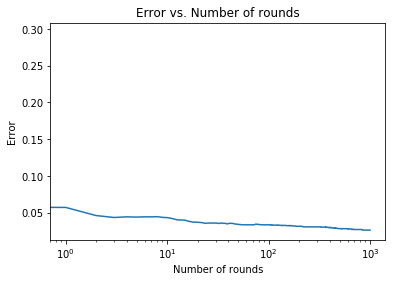

In [203]:
NN = Neural_Network()
error=[]
for i in range(1000):  # trains the NN 1,000 times
    #print ("#" + str(i) + " Loss: " + str(torch.mean((y - NN(X))**2).detach().item()))  # mean sum squared loss
    error.append(torch.mean((y - NN(X))**2).detach().item())
    NN.train(X, y)
    
plt.plot(range(1000),np.array(error))
plt.xlabel('Number of rounds')
plt.ylabel('Error')
plt.xscale('log')
plt.title('Error vs. Number of rounds')
plt.savefig('error.png')


NN.saveWeights(NN)
NN.predict()
    


[0.2953164577484131, 0.05714096873998642, 0.04600946232676506, 0.043423522263765335, 0.04432026669383049, 0.04394719377160072, 0.04430680721998215, 0.04426761344075203, 0.04453828185796738, 0.04358869418501854, 0.04325170814990997, 0.04226570203900337, 0.04093341901898384, 0.03996175155043602, 0.04001784697175026, 0.03973669558763504, 0.03852272033691406, 0.03772333636879921, 0.037115678191185, 0.037062063813209534, 0.0369243249297142, 0.036655593663454056, 0.03643921762704849, 0.035855766385793686, 0.03546617552638054, 0.03583807125687599, 0.03589382767677307, 0.035860802978277206, 0.03586212545633316, 0.03585279732942581, 0.03581518679857254, 0.03576746955513954, 0.03540416434407234, 0.03538021817803383, 0.03583630546927452, 0.03575544431805611, 0.03545358031988144, 0.035446975380182266, 0.035320837050676346, 0.03466026112437248, 0.03500499948859215, 0.03544900566339493, 0.03543766587972641, 0.035431694239377975, 0.035437241196632385, 0.035044703632593155, 0.03468053787946701, 0.0346